In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('max_columns', 50)
df = pd.read_csv('cleaned_hotel_bookings_data.csv')

Tahapan Pengerjaan Tugas
1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

In [2]:
def lead_time_vs_cancellation(df):
    df = df.copy()
    
    # group the lead time per three months
    def month_groups(row):
        row = row / 30
        if (row >= 0) & (row <= 3):
            return '0-3 Months'
        if (row > 3) & (row <= 6):
            return '3-6 Months'
        if (row > 6) & (row <= 9):
            return '6-9 Months'
        if (row > 9) & (row <= 12):
            return '9-12 Months'
        if (row > 12):
            return '>12 Months'
    
    df['lead_time_group'] = df['lead_time'].apply(month_groups)
    
    # aggregate
    df_agg = df.groupby(['hotel', 'lead_time_group']).agg({
        "is_canceled": ["sum", "count"]
    })
    df_agg = df_agg.reset_index() 
    df_agg.columns = ['hotel_type', 'lead_time_group', 'total_cancellation', 'total_booking']
    
    # calculate cancellation rate
    df_agg['cancellation_rate'] = df_agg['total_cancellation'] * 100 / df_agg['total_booking']
    df_agg['cancellation_rate'] = df_agg['cancellation_rate'].round(2)   
    
    return df_agg
       
df_agg = lead_time_vs_cancellation(df)
df_agg

,hotel_type,lead_time_group,total_cancellation,total_booking,cancellation_rate
0,City Hotel,0-3 Months,8899,34810,25.56
1,City Hotel,3-6 Months,4166,11336,36.75
2,City Hotel,6-9 Months,1819,4336,41.95
3,City Hotel,9-12 Months,744,1338,55.61
4,City Hotel,>12 Months,199,371,53.64
5,Resort Hotel,0-3 Months,3910,21285,18.37
6,Resort Hotel,3-6 Months,2123,6583,32.25
7,Resort Hotel,6-9 Months,1241,3637,34.12
8,Resort Hotel,9-12 Months,553,1438,38.46
9,Resort Hotel,>12 Months,43,244,17.62


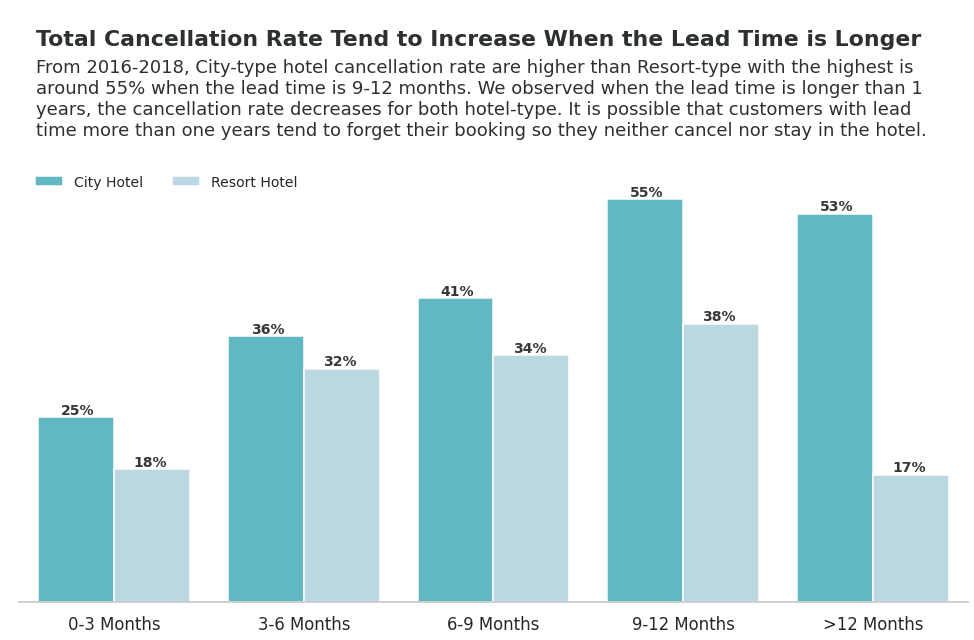

In [82]:
sns.set_theme(context="talk", style="whitegrid")

color_palette = ['#51C4D3', '#B4DBE9']
fig, ax = plt.subplots(1, 1, figsize=(17, 8), )#dpi=200)
sns.barplot(data=df_agg, x='lead_time_group', y='cancellation_rate', 
            hue='hotel_type', ax=ax, palette=color_palette)

for position in ['top', 'right', 'left']:
    ax.spines[position].set_visible(False)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.axes.yaxis.set_visible(False)
ax.legend(loc='lower left', 
          bbox_to_anchor=(xmin+0.48, ymin+0.87), 
          ncol=2, borderpad=2, 
          frameon=False, fontsize=14)

s = """
Total Cancellation Rate Tend to Increase When the Lead Time is Longer
"""
ax.text(
    x=xmin + 0.09, 
    y=ymax*1.33, 
    s=s, 
    fontsize=22,
    fontweight='bold',
    color='#2C302E',
    va='center', 
    ha='left',
)

s = r"""
From 2016-2018, City-type hotel cancellation rate are higher than Resort-type with the highest is 
around 55% when the lead time is 9-12 months. We observed when the lead time is longer than 1 
years, the cancellation rate decreases for both hotel-type. It is possible that customers with lead 
time more than one years tend to forget their booking so they neither cancel nor stay in the hotel.
"""
ax.text(
    x=xmin + 0.09, 
    y=ymax*1.19, 
    s=s, 
    fontsize=18,
    color='#2C302E',
    va='center', 
    ha='left',
)

city = df_agg[df_agg['hotel_type'] == 'City Hotel'].reset_index(drop=True)
resort = df_agg[df_agg['hotel_type'] == 'Resort Hotel'].reset_index(drop=True)

for i in city['cancellation_rate'].index:
    ax.annotate(
        f"{int(city['cancellation_rate'][i])}%", 
        xy=(i-0.19, city['cancellation_rate'][i] + 1),
        va='center', ha='center', color='#383838',
        fontweight='bold', fontsize=14
    )
    
for i in resort['cancellation_rate'].index:
    ax.annotate(
        f"{int(resort['cancellation_rate'][i])}%", 
        xy=(i+0.19, resort['cancellation_rate'][i] + 1),
        va='center', ha='center', color='#383838',
        fontweight='bold', fontsize=14
    )
    
plt.grid(False)
plt.ylabel('')
plt.xlabel('')
plt.ylim([0, 60])
plt.show()